<img src="logo_UCLA_blue_boxed.svg" alt="ucla logo" width="150" align="left"/>

### **MAE 150A - Intermediate Fluid Mechanics**

<hr />

# Steady flow through a duct with heat transfer
This notebook demonstrates the use of tools for computing steady compressible flow through a constant-area duct with heat transfer, commonly known as **Rayleigh flow**.

In [1]:
include("src/gasdynamics.jl")

In [2]:
using Plots
using LaTeXStrings

### Basics of Rayleigh flow
In this type of flow, we are primarily concerned with keeping track of the effects of heat transfer. This is felt primarily by a **change of stagnation enthalpy**

$$ h_{02} = h_{01} + q$$

where $q$ is the heat flux per unit mass into the duct.

#### Simple example
In a duct with helium, if the flow enters with stagnation temperature of 20 degrees C, how much does the stagnation temperature change if we add heat 400 kJ/kg?

In [3]:
q = HeatFlux(400,units=KJPerKG)
T01 = StagnationTemperature(20,units=C)

In [4]:
# starting stagnation enthalpy
h01 = StagnationEnthalpy(T01,gas=He)

# add the heat
h02 = StagnationEnthalpy(h01 + q)

# calculate the final stagnation temperature
T02 = StagnationTemperature(h02,gas=He)

Report the final value in Celsius:

In [5]:
# find the value in C
value(T02,C)

so the flow exiting the duct has stagnation temperature 97 C.

The sonic state is used as a reference, similar to Fanno flow and isentropic flow. All states share the same $T_{0}^*$, $p^*$, $u^*$, etc, so we can relate two points via this reference. We have functions that allow us to do this. For example, to find the ratio of the local stagnation temperature to its sonic reference value at Mach number 0.5 in air:

In [6]:
T0OverT0Star(MachNumber(0.5),RayleighFlow,gas=Air)

Note that the argument `RayleighFlow` was used to designate this function's use. If the Mach number is 1, then...

In [7]:
T0OverT0Star(MachNumber(1),RayleighFlow,gas=Air)

That is, $T_{0}$ is equal to $T_{0}^*$ when Mach number is 1, as it should be, by definition.

Alternatively, if we know $T_0/T_0^*$, we can determine $M$. However, there are sometimes two possible values of Mach number, as with Fanno flow and isentropic flow.

In [8]:
Mrange = range(0.001,8,length=801)
T0_over_T0star = []
for M in Mrange
    push!(T0_over_T0star,value(T0OverT0Star(MachNumber(M),RayleighFlow,gas=Air)))
end

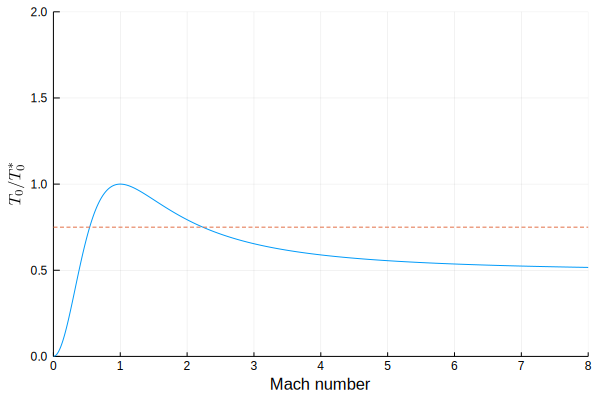

In [13]:
plot(Mrange,T0_over_T0star,xlim=(0,8),ylim=(0,2),xticks=0:1:8,xlabel="Mach number",ylabel=L"T_0/T_0^*",legend=false)
plot!(Mrange,0.75*ones(length(Mrange)),style=:dash)

For example, if $T_0/T_0^* = 0.75$, there are two possible Mach numbers, one subsonic and one supersonic. The correct one depends on the circumstances.

In [10]:
Msub, Msup = MachNumber(TemperatureRatio(0.75),RayleighFlow,gas=Air)

(MachNumber{Dimensionless}(0.5423261445466405, "MachNumber"), MachNumber{Dimensionless}(2.2360679774997907, "MachNumber"))

In [11]:
Msub

MachNumber = 0.542326 

In [12]:
Msup

MachNumber = 2.23607 

### Example
Suppose the flow of air in a duct enters with velocity 75 m/s at a pressure of 150 kPa and temperature 300 K. We add heat 900 kJ/kg. Find

(a) The value of the Mach number at the entrance and exit

(b) The velocity, pressure, and temperature at the exit

(c) The maximum amount of heat we can add so that the flow is just choked

Set the given values

In [16]:
u1 = Velocity(75)
p1 = Pressure(150,units=KPa)
T1 = Temperature(300)
q = HeatFlux(900,units=KJPerKG)

HeatFlux = 900000.0 JPerKG

We can immediately find the Mach number at the location 1, by finding $c_1$:

In [17]:
c1 = SoundSpeed(T1,gas=Air)
M1 = MachNumber(u1/c1)

MachNumber = 0.216021 

We will 
Now, use $M_1$ and $T_1$ to find $T_{01}$.

In [18]:
T01 = StagnationTemperature(T1,M1,Isentropic,gas=Air)

StagnationTemperature = 302.8 Kelvin

Now let's focus on state 2. We will use the basic relation $h_{02} = h_{01} + q$ to determine $T_{02}$.

In [19]:
h01 = StagnationEnthalpy(T01,gas=Air)
h02 = StagnationEnthalpy(h01+q)
T02 = StagnationTemperature(h02,gas=Air)

StagnationTemperature = 1198.77 Kelvin

To get the other states at location 2, we need the sonic reference conditions. For example, we will find

$$T_{02}/T_{0}^*$$
to determine $M_2$. We get this by calculating

$$T_{0}^* = T_{01}/(T_{01}/T_{0}^*)$$

In [20]:
T0star = StagnationTemperature(T01/T0OverT0Star(M1,RayleighFlow,gas=Air))

StagnationTemperature = 1520.05 Kelvin

In [21]:
T02_over_T0star = TemperatureRatio(T02/T0star)

TemperatureRatio = 0.788637 

In [23]:
M2sub, M2sup = MachNumber(T02_over_T0star,RayleighFlow,gas=Air)

(MachNumber{Dimensionless}(0.5733204685023363, "MachNumber"), MachNumber{Dimensionless}(2.0239173983089978, "MachNumber"))

The subsonic one is the only possible candidate, because the flow came in at subsonic speed and can't have passed through Mach number 1. Thus

In [24]:
M2 = M2sub

MachNumber = 0.57332 

We have increased the Mach number from 0.216 to 0.573 by adding heat.

Now find the other reference states that we will use:

In [27]:
pstar = Pressure(p1/POverPStar(M1,RayleighFlow,gas=Air))
ustar = Velocity(u1/VOverVStar(M1,RayleighFlow,gas=Air))
Tstar = Temperature(T1/TOverTStar(M1,RayleighFlow,gas=Air))

Temperature = 1266.71 Kelvin

and now the values themselves. For example, we use $M_2$ to calculate $p_2/p^*$ and then calculate $p_2 = p^*(p_2/p^*)$.

In [28]:
p2 = Pressure(pstar*POverPStar(M2,RayleighFlow,gas=Air))

Pressure = 109439.0 Pascals

In [29]:
u2 = Velocity(ustar*VOverVStar(M2,RayleighFlow,gas=Air))

Velocity = 385.429 MPerSec

In [30]:
T2 = Temperature(Tstar*TOverTStar(M2,RayleighFlow,gas=Air))

Temperature = 1124.82 Kelvin

Finally, let us calculate the maximum heat flux -- the heat flux that brings the flow just to sonic conditions when starting at the given conditions at location 1. This comes from

$$ q_{max} = h_{0}^* - h_{01}$$

We have a convenience function for that, based on stagnation temperature:

In [32]:
qmax = HeatFlux(T01,T0star,gas=Air)

HeatFlux = 1.22273e6 JPerKG

In [33]:
value(qmax,KJPerKG)

1222.7275208333333

Thus, we can add up to 1223 kJ/kg before the flow gets choked. Any more than that will cause the entrance conditions to change.